In [1]:
import pandas as pd,numpy as np

In [2]:
df = pd.read_csv("data.csv",sep = ';') # import data from CSV file

In [3]:
df #view the data

,ptime,pressure,temperature,power_measurement,time,wind_speed,wind_direction
0,2021-01-01 00:00:00,100353.250,275.766,1813.399,2021-01-01 00:00:00,6.011,239.897
1,2021-01-01 00:00:00,100353.250,275.766,1956.420,2021-01-01 00:15:00,6.011,239.897
2,2021-01-01 00:00:00,100353.250,275.766,2244.866,2021-01-01 00:30:00,6.011,239.897
3,2021-01-01 00:00:00,100353.250,275.766,2672.354,2021-01-01 00:45:00,6.011,239.897
4,2021-01-01 00:00:00,100349.438,275.032,2268.128,2021-01-01 01:00:00,5.700,243.619
...,...,...,...,...,...,...,...
205747,2021-12-31 12:00:00,101598.125,282.760,26654.252,2021-12-31 21:45:00,11.632,258.970
205748,2021-12-31 12:00:00,101667.812,282.819,24175.309,2021-12-31 22:00:00,11.832,257.181
205749,2021-12-31 12:00:00,101667.812,282.819,24095.749,2021-12-31 22:15:00,11.832,257.181
205750,2021-12-31 12:00:00,101667.812,282.819,22722.504,2021-12-31 22:30:00,11.832,257.181


In [4]:
(df.isna().sum()/ len(df))*100 # check the NA values in %

ptime                0.000000
pressure             0.000000
temperature          0.000000
power_measurement    4.298379
time                 0.000000
wind_speed           0.000000
wind_direction       0.000000
dtype: float64

In [5]:
print(df.dtypes) # check the datatypes of the features 

ptime                 object
pressure             float64
temperature          float64
power_measurement    float64
time                  object
wind_speed           float64
wind_direction       float64
dtype: object


In [6]:
df.ptime = pd.to_datetime(df.ptime)  #set datetime as pands timeseries 
df.time = pd.to_datetime(df.time)

<AxesSubplot:title={'center':'Power Measurement'}, xlabel='power_measurement'>

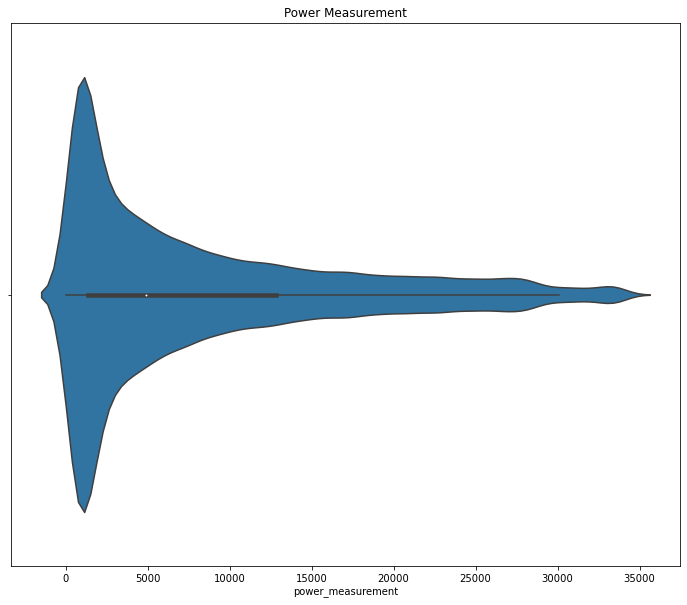

In [8]:
import seaborn as sns
import matplotlib.pyplot  as plt

plt.figure(figsize=(12,10))
plt.title('Power Measurement')
sns.violinplot(x='power_measurement' ,data =df)  #observe distribution of the measurements, outliers

<AxesSubplot:title={'center':'Power Genration'}, xlabel='time', ylabel='kw'>

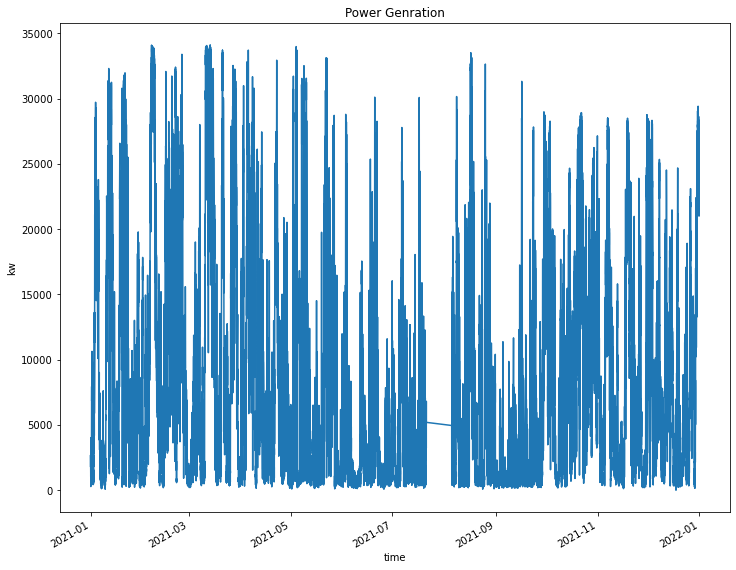

In [47]:
from matplotlib import pyplot
plt.figure(figsize=(12,10))
plt.title('Power Genration')
plt.ylabel('kw')
df.power_measurement.plot()  #overview of entire measurement w.r.t time

<AxesSubplot:title={'center':'Hourly Mean Power Generation from Wind Turbine'}, xlabel='Hour', ylabel='Measured Power'>

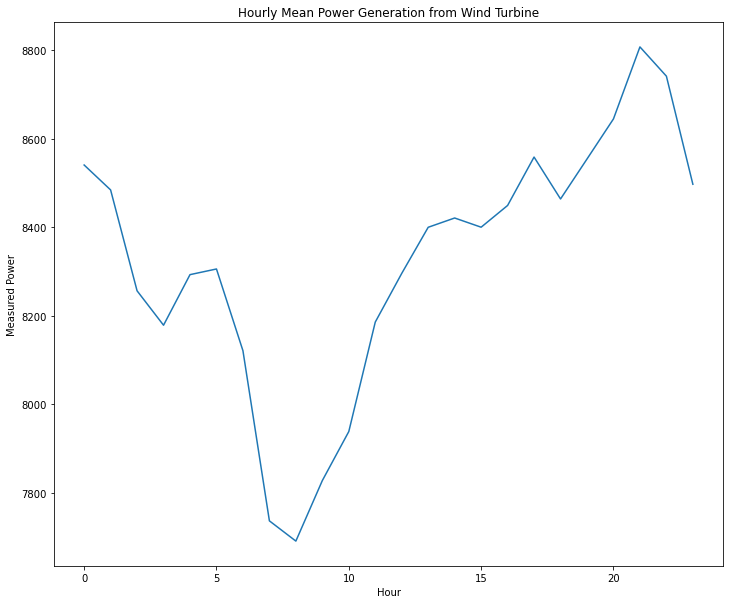

In [10]:
plt.figure(figsize=(12,10))   #hourly average power generation of the year
plt.title('Hourly Mean Power Generation from Wind Turbine')
plt.xlabel('Hour')
plt.ylabel('Measured Power')
sns.lineplot(y='power_measurement',x = 'time', data  = df.groupby([df['time'].dt.hour], dropna =True).power_measurement.mean().reset_index(name ='power_measurement'))

pressure = -0.32084920954856616
temperature = -0.043576759507831644
power_measurement = nan
wind_speed = 0.5426690446865858
wind_direction = -0.46877525776892676


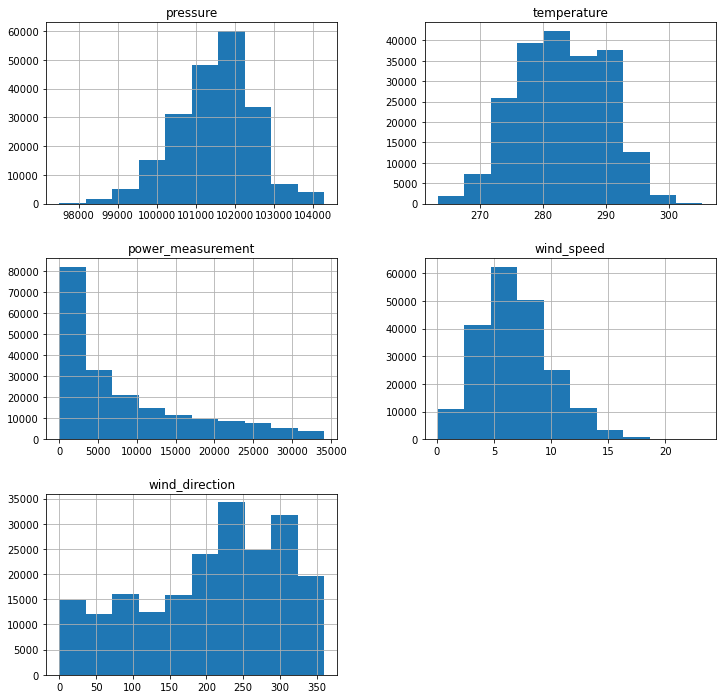

In [11]:
numerical_variables = ['pressure', 'temperature', 'power_measurement', 'wind_speed','wind_direction']
df[numerical_variables].hist(figsize=(12, 12))  #observe the distribution of features and target 
from scipy.stats import skew 
for i in numerical_variables:
    print(i + " =", skew(df[i]))

C:\Users\patil\AppData\Local\Temp\ipykernel_15764\88143213.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:title={'center':'Feature corelation plot'}>

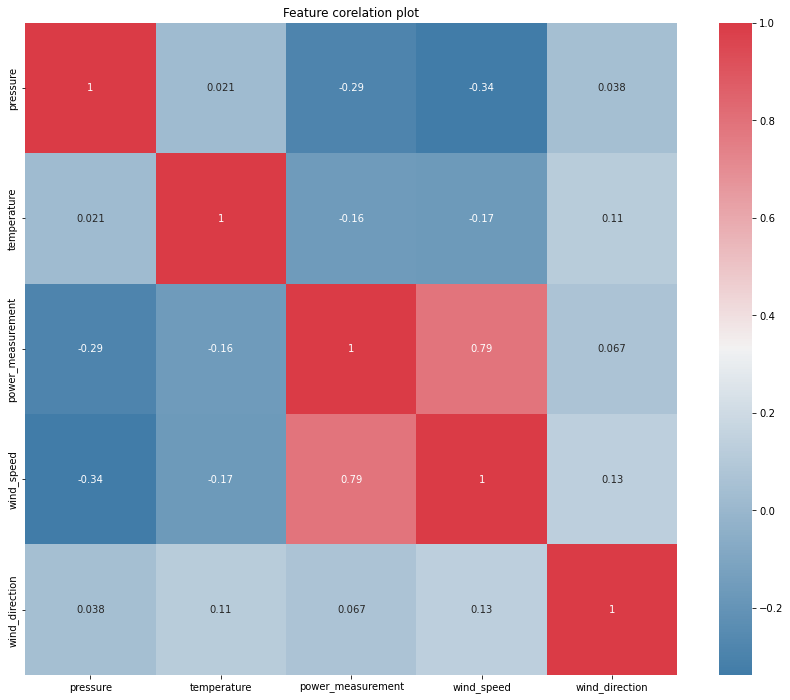

In [13]:
corr = df.corr()     #to check the multicolinearity between features
plt.figure(figsize=(15,12))
plt.title('Feature corelation plot')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, annot=True)


<AxesSubplot:title={'center':'Hourly Mean Wind Speed at Wind Turbine'}, xlabel='Hour', ylabel='Measured Wind Speed'>

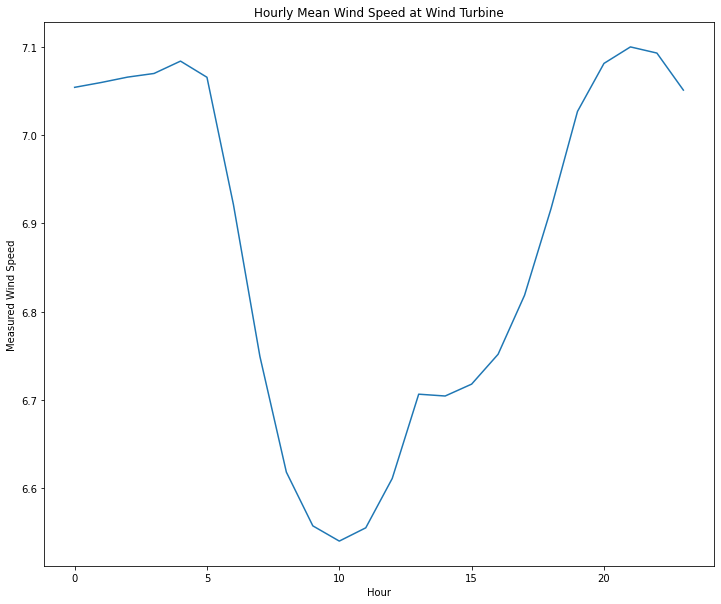

In [14]:
plt.figure(figsize=(12,10)) #wind speed is highy proportional to the power measurement(target)
plt.title('Hourly Mean Wind Speed at Wind Turbine')
plt.xlabel('Hour')
plt.ylabel('Measured Wind Speed')
sns.lineplot(y='wind_speed',x = 'time', data  = df.groupby([df['time'].dt.hour],dropna =True).wind_speed.mean().reset_index(name ='wind_speed'))

#### Data Engineering 

In [15]:
df = df.drop(['ptime'], axis=1) #prediction time is not important now

In [16]:
df

,pressure,temperature,power_measurement,time,wind_speed,wind_direction
0,100353.250,275.766,1813.399,2021-01-01 00:00:00,6.011,239.897
1,100353.250,275.766,1956.420,2021-01-01 00:15:00,6.011,239.897
2,100353.250,275.766,2244.866,2021-01-01 00:30:00,6.011,239.897
3,100353.250,275.766,2672.354,2021-01-01 00:45:00,6.011,239.897
4,100349.438,275.032,2268.128,2021-01-01 01:00:00,5.700,243.619
...,...,...,...,...,...,...
205747,101598.125,282.760,26654.252,2021-12-31 21:45:00,11.632,258.970
205748,101667.812,282.819,24175.309,2021-12-31 22:00:00,11.832,257.181
205749,101667.812,282.819,24095.749,2021-12-31 22:15:00,11.832,257.181
205750,101667.812,282.819,22722.504,2021-12-31 22:30:00,11.832,257.181


In [17]:
df = df.set_index(["time"]) #setting the index as a timeseries

In [18]:
df['power_measurement'] = df.power_measurement.interpolate(method ="time") #filling the NA values 

<AxesSubplot:xlabel='time'>

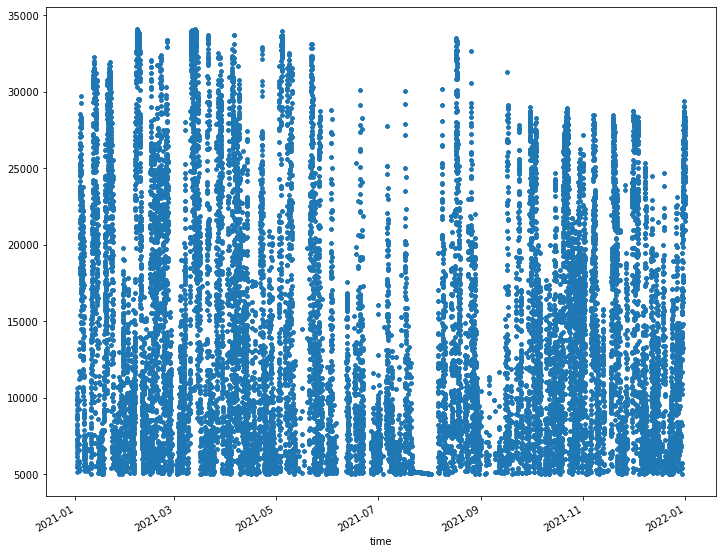

In [19]:
df["power_measurement"][df["power_measurement"] > 5000].plot(figsize=(12,10), style= ".") #to observe the distribution of the outliers

In [20]:
df2 = df.query('power_measurement < 30000').copy() #eleminating the outliers 

In [21]:
df2["minute"] = df2.index.minute  #adding feature space 
df2["hour"]= df2.index.hour
df2["dayofweek"]= df2.index.dayofweek

In [22]:
target_map  = df2["power_measurement"].to_dict()    #adding feature space 
df2['lag1'] = (df2.index - pd.Timedelta('1 day')).map(target_map)
df2['lag2'] = (df2.index - pd.Timedelta('7 days')).map(target_map)

In [23]:
df2

,pressure,temperature,power_measurement,wind_speed,wind_direction,minute,hour,dayofweek,lag1,lag2
time,,,,,,,,,,
2021-01-01 00:00:00,100353.250,275.766,1813.399,6.011,239.897,0,0,4,NaN,NaN
2021-01-01 00:15:00,100353.250,275.766,1956.420,6.011,239.897,15,0,4,NaN,NaN
2021-01-01 00:30:00,100353.250,275.766,2244.866,6.011,239.897,30,0,4,NaN,NaN
2021-01-01 00:45:00,100353.250,275.766,2672.354,6.011,239.897,45,0,4,NaN,NaN
2021-01-01 01:00:00,100349.438,275.032,2268.128,5.700,243.619,0,1,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 21:45:00,101598.125,282.760,26654.252,11.632,258.970,45,21,4,27859.915,6935.114
2021-12-31 22:00:00,101667.812,282.819,24175.309,11.832,257.181,0,22,4,27676.840,7042.600
2021-12-31 22:15:00,101667.812,282.819,24095.749,11.832,257.181,15,22,4,27042.246,6439.026


In [24]:
X,y = df2.drop(["power_measurement"],axis = 1), df2["power_measurement"]  #create train, test, validation datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False) # 0.25 x 0.8 = 0.2

In [25]:
import xgboost as xgb  #traing of XGB ML model with CV

reg = xgb.XGBRegressor(base_score=0.5,n_estimators=800,
                       objective='reg:linear',learning_rate = 0.003)

reg.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_val, y_val)],verbose=100)

[22:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:10622.10582	validation_1-rmse:10239.57623
[100]	validation_0-rmse:8302.16428	validation_1-rmse:8206.11574
[200]	validation_0-rmse:6672.31616	validation_1-rmse:6883.96505
[300]	validation_0-rmse:5552.15299	validation_1-rmse:6088.83087
[400]	validation_0-rmse:4795.86308	validation_1-rmse:5619.05692
[500]	validation_0-rmse:4285.70151	validation_1-rmse:5364.74508
[600]	validation_0-rmse:3933.37558	validation_1-rmse:5168.29769
[700]	validation_0-rmse:3695.73541	validation_1-rmse:5030.38865
[799]	validation_0-rmse:3535.74574	validation_1-rmse:5019.01573


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.003, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=800, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [26]:
y_test = y_test.reset_index()    #dataset creation of prediction and ground truth
y_test['prediction']= pd.Series(reg.predict(X_test))
y_test = y_test.set_index('time')

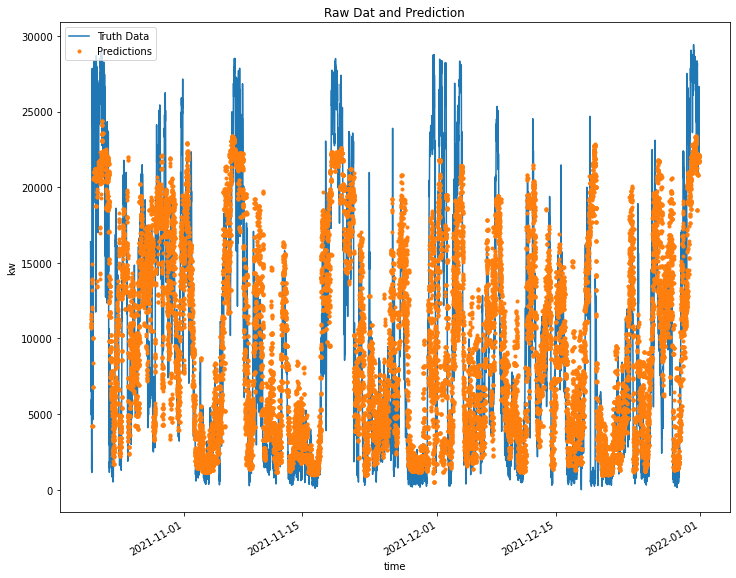

In [29]:
ax = y_test[['power_measurement']].plot(figsize=(12, 10))  #plotting the real Vs prediction values
y_test['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.ylabel('kw')
plt.show()

<AxesSubplot:title={'center':'Feature Importance'}>

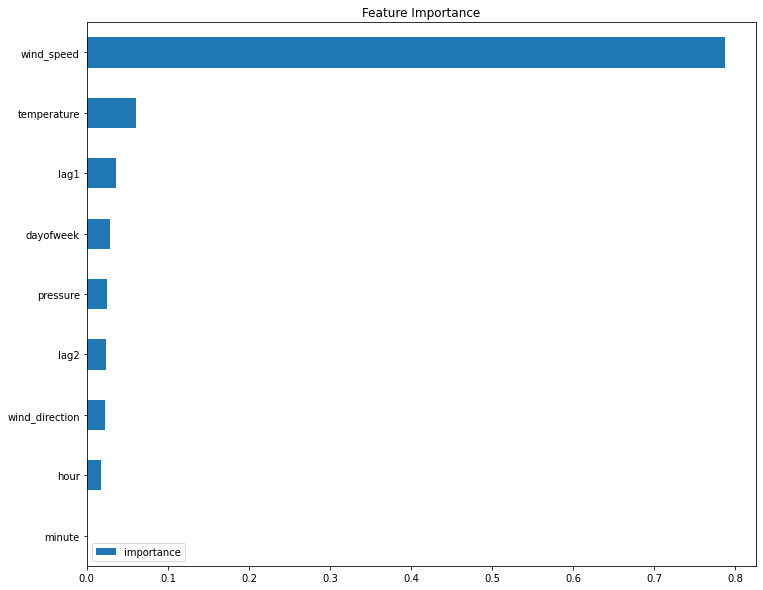

In [45]:
fi = pd.DataFrame(data=reg.feature_importances_,  #feature importance plot 
             index=reg.feature_names_in_,
             columns=['importance'])

fi.sort_values('importance').plot(kind='barh', title='Feature Importance',figsize=(12,10))
